In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=8,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


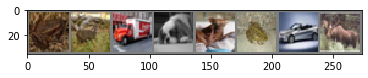

 frog  deer truck   dog   dog  frog   car  deer


torch.Size([8, 3, 32, 32])

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))
images.shape

In [5]:
labels

tensor([6, 4, 9, 5, 5, 6, 1, 4])

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [8]:
for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.724
[1,  4000] loss: 1.460
[1,  6000] loss: 1.388
[2,  2000] loss: 1.291
[2,  4000] loss: 1.246
[2,  6000] loss: 1.222
[3,  2000] loss: 1.145
[3,  4000] loss: 1.130
[3,  6000] loss: 1.121
[4,  2000] loss: 1.049
[4,  4000] loss: 1.063
[4,  6000] loss: 1.053
[5,  2000] loss: 0.972
[5,  4000] loss: 0.995
[5,  6000] loss: 1.014
[6,  2000] loss: 0.938
[6,  4000] loss: 0.955
[6,  6000] loss: 0.951
[7,  2000] loss: 0.882
[7,  4000] loss: 0.920
[7,  6000] loss: 0.931
[8,  2000] loss: 0.862
[8,  4000] loss: 0.887
[8,  6000] loss: 0.900
[9,  2000] loss: 0.825
[9,  4000] loss: 0.866
[9,  6000] loss: 0.859
[10,  2000] loss: 0.803
[10,  4000] loss: 0.834
[10,  6000] loss: 0.840
[11,  2000] loss: 0.768
[11,  4000] loss: 0.821
[11,  6000] loss: 0.823
[12,  2000] loss: 0.740
[12,  4000] loss: 0.787
[12,  6000] loss: 0.808
[13,  2000] loss: 0.725
[13,  4000] loss: 0.765
[13,  6000] loss: 0.786
[14,  2000] loss: 0.707
[14,  4000] loss: 0.737
[14,  6000] loss: 0.774
[15,  2000] loss: 0

In [9]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

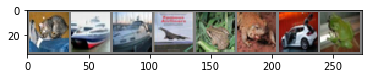

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog
Predicted:  truck   car  ship plane  deer  frog  bird  frog


In [10]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))

net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(8)))

In [11]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 59 %


In [12]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 58 %
Accuracy of   car : 73 %
Accuracy of  bird : 41 %
Accuracy of   cat : 46 %
Accuracy of  deer : 54 %
Accuracy of   dog : 42 %
Accuracy of  frog : 67 %
Accuracy of horse : 62 %
Accuracy of  ship : 71 %
Accuracy of truck : 71 %
